In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calories= pd.read_csv('calories.csv')
Exercise= pd.read_csv('exercise.csv')

In [3]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
Exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [5]:
Exercise['calories'] = calories['Calories'].values

In [6]:
Exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [8]:
def change(X):
    gender=[]
    for i in range(0,len(X)):
        if(X[i] == 'male'):
            gender.append(0)
        elif(X[i] == 'female'):
            gender.append(1)

    return gender

Exercise['Gender'] = change(Exercise['Gender'].values)

In [9]:
Exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [12]:
X=Exercise.drop(['User_ID','calories'],axis=1).values

In [13]:
X

array([[  0. ,  68. , 190. , ...,  29. , 105. ,  40.8],
       [  1. ,  20. , 166. , ...,  14. ,  94. ,  40.3],
       [  0. ,  69. , 179. , ...,   5. ,  88. ,  38.7],
       ...,
       [  1. ,  43. , 159. , ...,  16. ,  90. ,  40.1],
       [  0. ,  78. , 193. , ...,   2. ,  84. ,  38.3],
       [  0. ,  63. , 173. , ...,  18. ,  92. ,  40.5]])

In [14]:
Y = Exercise['calories'].values

In [15]:
Y

array([231.,  66.,  26., ...,  75.,  11.,  98.])

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential() #Declaring Model
model.add(Dense(7)) #Inserting Input Layer
model.add(Dense(10,activation='relu')) #Inserting Hidden Layer-1
model.add(Dense(5,activation='relu')) #Inserting Hidden Layer-2
model.add(Dense(1,activation='relu')) #Output Layer activation = ReLU bcz of regression model

model.compile(optimizer='adam',loss='mse') #Implement Gradient Descent Algorithm

In [21]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
352/352 [==============================] - 4s 2ms/step - loss: 5026.5469 - val_loss: 3259.1292
Epoch 2/100
352/352 [==============================] - 1s 2ms/step - loss: 2533.4705 - val_loss: 1635.5199
Epoch 3/100
352/352 [==============================] - 1s 2ms/step - loss: 896.9094 - val_loss: 533.3527
Epoch 4/100
352/352 [==============================] - 1s 2ms/step - loss: 365.7644 - val_loss: 275.5694
Epoch 5/100
352/352 [==============================] - 1s 2ms/step - loss: 204.7372 - val_loss: 177.1938
Epoch 6/100
352/352 [==============================] - 1s 2ms/step - loss: 154.0677 - val_loss: 155.4395
Epoch 7/100
352/352 [==============================] - 1s 2ms/step - loss: 140.5613 - val_loss: 144.7278
Epoch 8/100
352/352 [==============================] - 1s 2ms/step - loss: 138.0296 - val_loss: 143.3362
Epoch 9/100
352/352 [==============================] - 1s 2ms/step - loss: 135.3992 - val_loss: 142.7410
Epoch 10/100
352/352 [=============================

<AxesSubplot:>

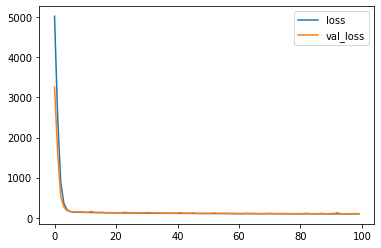

In [22]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [23]:
pred = model.predict(X_test)

118/118 [==============================] - 2s 1ms/step


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(Y_test,pred)

96.71977761628177

In [26]:
model.save('Calories.h5')

In [28]:
from tensorflow.keras.models import load_model

In [29]:
model1 = load_model('Calories.h5')

In [31]:
pred_new = model1.predict(X_test)

118/118 [==============================] - 0s 1ms/step
